# Visualización de los datos

Para esta práctica vamos a empezar a ver como obtener información estadística básica de nuestros datos como conteos, promedios, correlaciones, etc.


Utilizaremos herramientas sencillas como numpy y pandas para iniciar. Despúes pasaremos a la parte de graficar nuestros datos, con lo cual estaremos manejando varias alternativas de liberías que se especializan en graficar datos.



## Información estadística básica 

In [23]:
import pandas as pd

Vamos a crear un dataset sencillo para poder empezar a manipular números en python. En el ejemplo tenemos un diccionario (recordar que el diccionario es también una forma de dataset) en donde tenemos el nombre de varias personas, su edad, su calificación en primer examen y en su segundo examen.

In [2]:
data = {'Nombre': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'Edad': [42, 52, 36, 24, 73], 
        'Examen_1': [80, 60, 98, 69, 80],
        'Examen_2': [78, 76, 90, 62, 80]}
df = pd.DataFrame(data, columns = ['Nombre', 'Edad', 'Examen_1', 'Examen_2'])
df

,Nombre,Edad,Examen_1,Examen_2
0,Jason,42,80,78
1,Molly,52,60,76
2,Tina,36,98,90
3,Jake,24,69,62
4,Amy,73,80,80


En las siguientes instrucciones iniciaremos con algunas de las opciones que maneja Pandas para la estadística básica, como por ejemplo:

- sum(): Suma todos los elementos de la columna seleccionada.
- mean(): Promedio.
- cumsum(): Suma acumulada de la columna fila por fila.
- describe(): Resumen estadístico de la columna.
- count(): Cuantos elementos no nulos hay en la columna.
- min(), max(): Minimo y máximo de una columna.
- median(), var(), std(): Mediana, varianza y desviación estandar.
- skew(): Valor de asimetría en los datos.
- kurt(): Característica de forma de su distribución de frecuencias/probabilidad.
- corr(): Correlación de los datos
- cov(): Covarianza de los datos.

In [4]:
df['Edad'].sum()

227

In [5]:
df['Examen_1'].mean()

77.4

In [6]:
df['Examen_1'].cumsum()

0     80
1    140
2    238
3    307
4    387
Name: Examen_1, dtype: int64

In [7]:
df['Examen_2'].describe()

count     5.000000
mean     77.200000
std      10.059821
min      62.000000
25%      76.000000
50%      78.000000
75%      80.000000
max      90.000000
Name: Examen_2, dtype: float64

In [8]:
df['Examen_1'].count()

5

In [10]:
df['Examen_1'].min()

60

In [11]:
df['Examen_1'].max()

98

In [12]:
df['Examen_1'].median()

80.0

In [13]:
df['Examen_1'].var()

202.8

In [14]:
df['Examen_1'].std()

14.24078649513432

In [15]:
df['Examen_1'].skew()

0.4207364079960832

In [16]:
df['Examen_1'].kurt()

0.41325292064937

In [17]:
df.corr()

,Edad,Examen_1,Examen_2
Edad,1.000000,-0.062572,0.365620
Examen_1,-0.062572,1.000000,0.735726
Examen_2,0.365620,0.735726,1.000000


In [18]:
df.cov()

,Edad,Examen_1,Examen_2
Edad,340.80,-16.45,67.9
Examen_1,-16.45,202.80,105.4
Examen_2,67.90,105.40,101.2


In [9]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
reviews = pd.read_csv("/Users/mayraberrones/Documents/GitHub/Ciencia_de_Datos/wine-reviews/winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [3]:
reviews.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

# Graficar datos univariantes.

## Grafica de barras y datos categoricos:

Los histogramas son la forma mas sencilla de visualizacion de datos. En nuestro caso estaremos haciendo categorias de provincias del mundo que producen vino, y el numero de vinos que producen.


KeyboardInterrupt: 

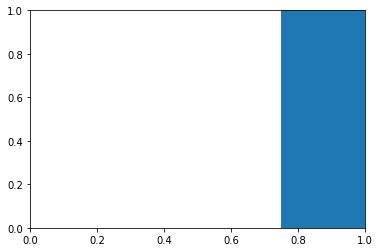

In [15]:
reviews.plot.bar()

En el codigo de arriba intentamos que nos hiciera un plot de todos los datos. Como son muchos datos, y no todos ellos son numericos, nos va a marcar un error. Por esto, mandamos a llamar a una sola columna. Como sabemos que esta columna tiene los nombres de las provincias y no es un dato numerico, lo cambiamos con Value_counts que es la suma que tiene cada valor unico.

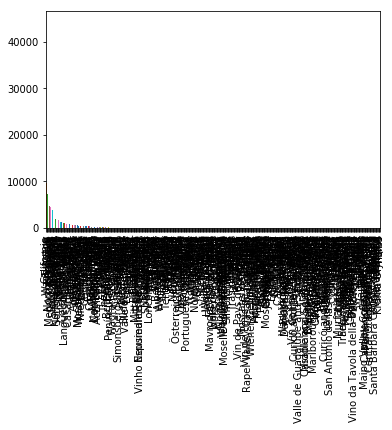

In [12]:
reviews['province'].value_counts().plot.bar()

Esta grafica aun parece tener mucho ruido. Asi que solo le pondremos pocos datos para poder apreciarla mejor.

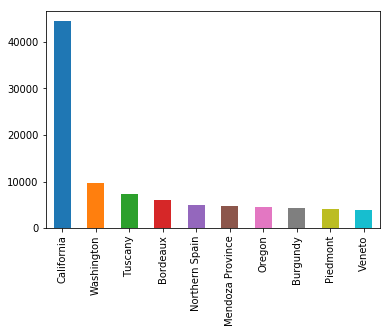

In [14]:
reviews['province'].value_counts().head(10).plot.bar()

Claramente vemos que california tiene la mayor cantidad de vinos. Pero ahora queremos ver la proporcion en el eje de las y, en lugar de la cantidad. en la grafica de abajo ahora podemos ver que la proporcion de vinos que produce California es casi el 30 porciento del que se produce en todo el mundo.

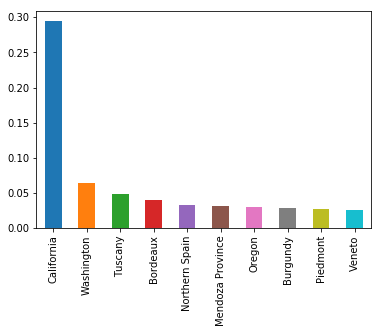

In [13]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()


Los histogramas son bastante flexibles. La altura puede representar cualquier cosa, siempre y cuando sea un numero. Cada barra puede presentar cualquier cosa siempre y cuando sea una categoria.


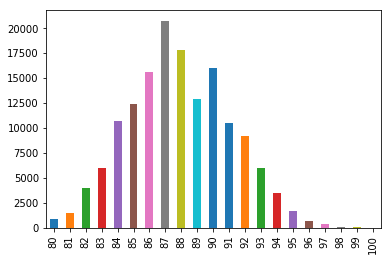

In [17]:
reviews['points'].value_counts().sort_index().plot.bar()

### Pregunta 1.
Que representan los datos de la grafica de arriba.

## Grafica de lineas.

Cuando hay demasiados valores unicos que pueden estar en el eje X, una grafica de barras se vuelve un poco apretada para los datos. Lo que tenemos que usar ahora es una grafica de linea.


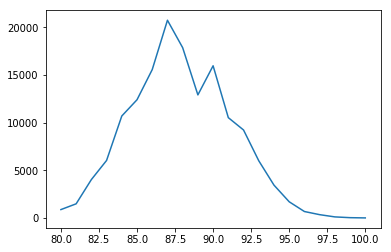

In [18]:
reviews['points'].value_counts().sort_index().plot.line()

Una grafica de linea es mejor para distribuciones con muchos valores o categorias. Por esto no es buena para distinguir bien valores individuales. Si queremos rellenar los valores como una figura, remplazamos el line() por area().



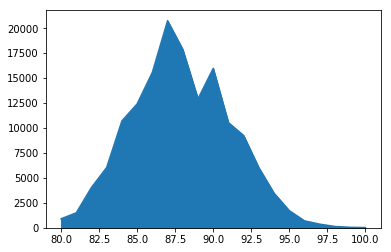

In [19]:
reviews['points'].value_counts().sort_index().plot.area()

## Histogramas

Ahora, para trabajar con datos en intervalos, las graficas de lineas trabajan bien. Las graficas de barras no, porque los datos de intervalo tienden a variar mucho.

Para esto usaremos los histogramas.

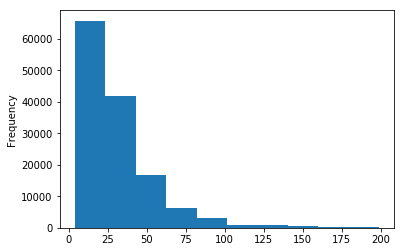

In [20]:
reviews[reviews['price'] < 200]['price'].plot.hist()

Ahora tenemos que los valores de x no solo son una categoria, si no que son un intervalo. Una de las desventajas es que los histogramas siempre van a dividir los datos en intervalos del mismo tamaño, por lo que si introducimos todos los datos, como vemos en la grafica de abajo, no se van a alcanzar a apreciar los intervalos con muy pocos valores.

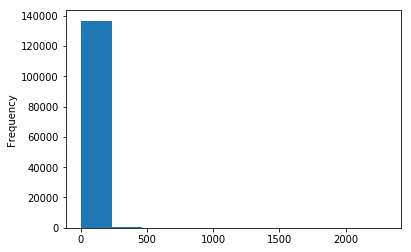

In [21]:
reviews['price'].plot.hist()

Una de las columnas con los datos que estamos trabajando que se beneficia de este tipo de graficas es la de points, porque cuenta con variables ordinales.

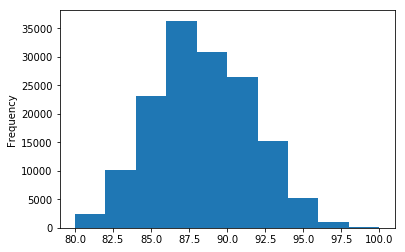

In [22]:
reviews['points'].plot.hist()

## Graficar datos bi-variantes.

### Scatter plot

La grafica bi variante mas sencilla es la del scatter plot. Un scatter plot simple hace un mapa de cada variable de interes en un espacio bi dimensional.


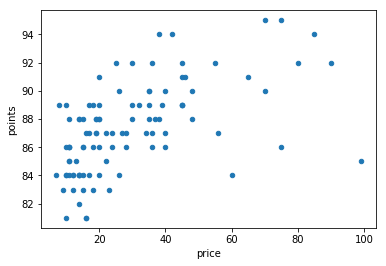

In [23]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

Esta grafica nos muestra que el precio y los puntos estan muy pobremente realcionados. Esto significa que entre mas caro es el vino, generalmente gana mas puntos cuando se le hace un review.

Hay que tomar en cuenta que la parte que dice sample(100) es porque tuvimos que hacer mas pequeña nuestra muestra de datos, tomando solo 100 puntos de todo el set de datos.Eso es porque las scater plot no les va bien cuando los puntos estan en el mismo lugar que otro dentro del mapa. 

Esto se tiene que hacer cuando tu grafica no es muy explicativa, o se ve solo como una mancha uniforme en la grafica, como la que podemos ver en la parte de abajo.

Por esto las graficas de scatter plot trabajan mejor con datasets pequeños, para evitar lo que se conoce como overplotting.

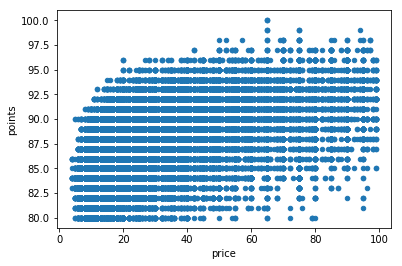

In [24]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

Hexplot¶
A hex plot aggregates points in space into hexagons, and then colors those hexagons based on the values within them:

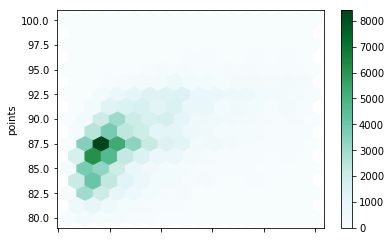

In [27]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

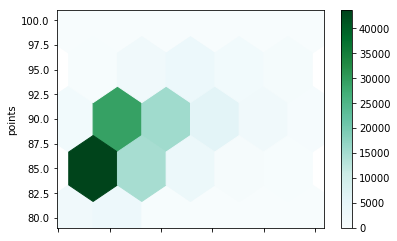

In [28]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=5)

Los datos en esta grafica se pueden comparar directamente con los resultados del scatter plot. Lo que nos dice en esta grafica es bastante diferente. Aqui podemos ver que se hace un pequeño cluster de vinos con 87.5 puntos, cosa que no podiamos deducir viendo la grafica del scatter plot porque para evitar el overploting se quitan los datos que son muy similares en precio o calificación.

Este tipo de graficas tanto como el scatter plot pueden ser usadas para intervalos de variables y variables ordinales categoricas.


## Stacked plots

Las graficas de scatter plot y hexagonal plot son bastante nuevas, pero podemos usar graficas mas simples para este tipo de problema. Una grafica Stacked es cuando las variables se grafican una encima de la otra.
Scatter plots and hex plots are new. But we can also use the simpler plots we saw in the last notebook.

Aqui usamos un resumen de los datos del vino para poder realizar la grafica.

In [36]:
wine_counts = pd.read_csv("/Users/mayraberrones/Documents/GitHub/Ciencia_de_Datos/Mineria-datos/point.csv",index_col=0)


Como en las otras bases de datos, pedimos el head() de los datos para saber como se distribuyen las columnas.

In [37]:
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


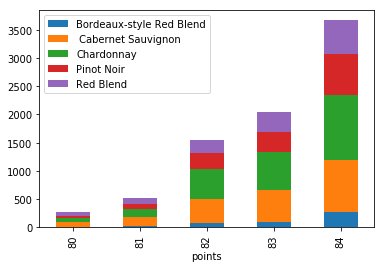

In [32]:
wine_counts.plot.bar(stacked=True)

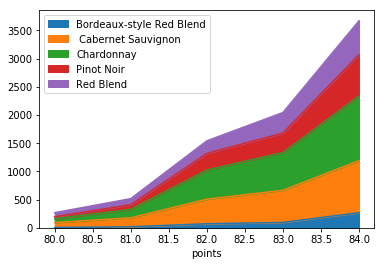

In [38]:
wine_counts.plot.area()

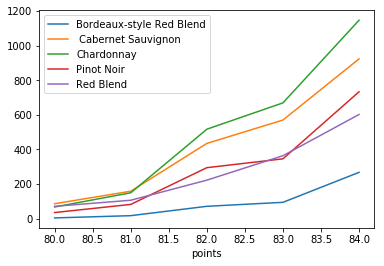

In [39]:
wine_counts.plot.line()

In [40]:
import seaborn as sns


En lugar de la grafica de barras de matplotlib, seaborn tiene countplot.

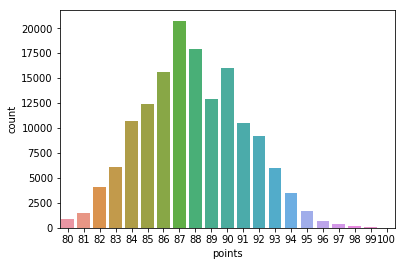

In [41]:
sns.countplot(reviews['points'])

 KDE son las iniciales de Kernel Density Estimate. Es una tecnica estadística para quitar el ruido dentro de los datos. Toma en cuenta una de las debilidades mas importantes de una grafica de lineas, puliendo los outliers o valores que estan de por medio lo que causa que la linea se mueva de manera repentina.
 
 Las graficas KDE tienen la característica de dar la forma más fiel a datos que forman intervalos.  Sin embargo, no es recomendada por datos categoricos ordinales. Las graficas de KDE tambien pueden ser usadas en dos dimensiones, como se muestra en la grafica de abajo.



/Users/mayraberrones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


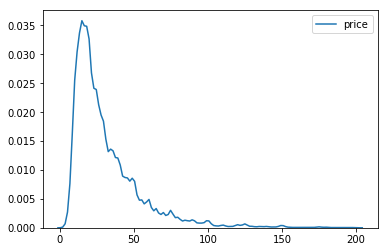

In [42]:
sns.kdeplot(reviews.query('price < 200').price)

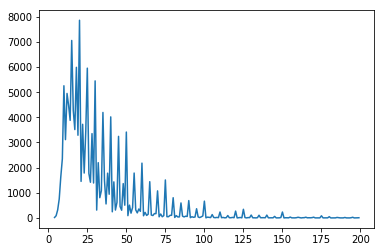

In [43]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

/Users/mayraberrones/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


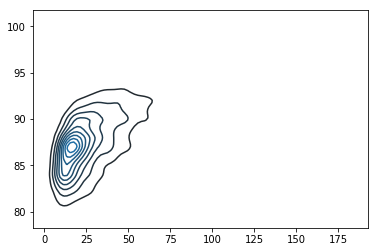

In [44]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

Graficas de distancias es lo mismo que los histogramas de en matplotlib.

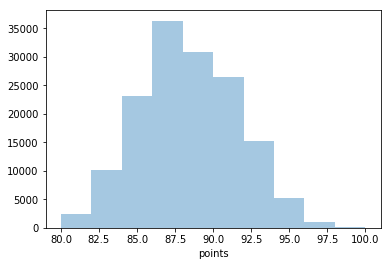

In [45]:
sns.distplot(reviews['points'], bins=10, kde=False)


Ahora tenemos los jointplots, que son como los scatter plots o los hexplots (graficas de coeficientes de correlacion), pero que muestran tambien histogramas de los datos en cada axis de la grafica.



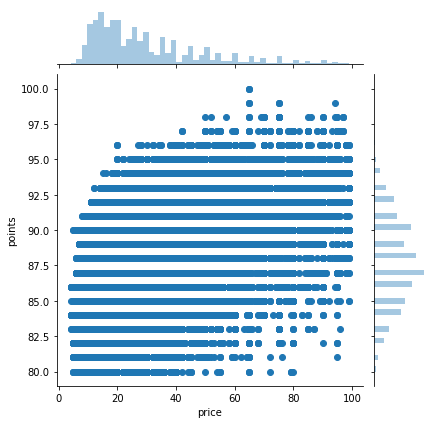

In [46]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

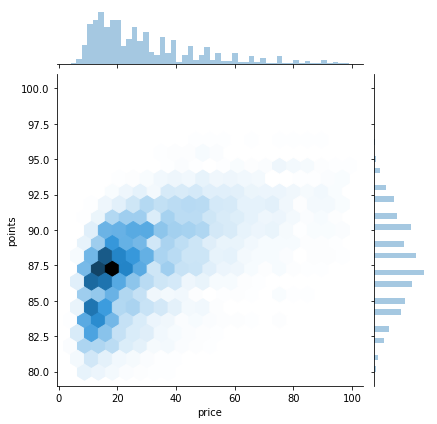

In [47]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)

## Box plots

El centro de la distribución es la caja en el boxplot (en español se le llama caja bigote). en la parte mas alta de la caja esta el percentil de 75, y en la parte mas baja es el percentil 25. La linea media es la mediana.

La otra parte de la grafica, los bigotes, nos muestra hasta donde se extienden los puntos fuera del centro de distribucion de los datos. Los pequeños circulos fuera de los bigotes son los elementos atipicos.

Este tipo de datos solo trabajan con variables de intervalo y variables nominales con una gran candidad de posibles valores. Estas graficas asumen que tus datos estan normalmente distribuidos. En caso de que los resultados no tengan sentido, una conclusion puede ser que tus datos no estan normalmente distribuidos.


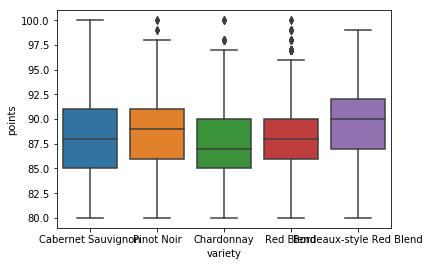

In [48]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

La grafica de violin es parecida a las caracteristicas del boxplot.

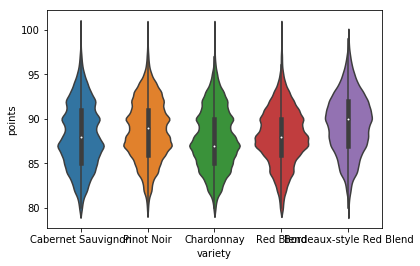

In [49]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

In [51]:
import pandas as pd
import pandas_profiling
df = pd.read_csv("/Users/mayraberrones/Documents/GitHub/Ciencia_de_Datos/Mineria-datos/w-data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


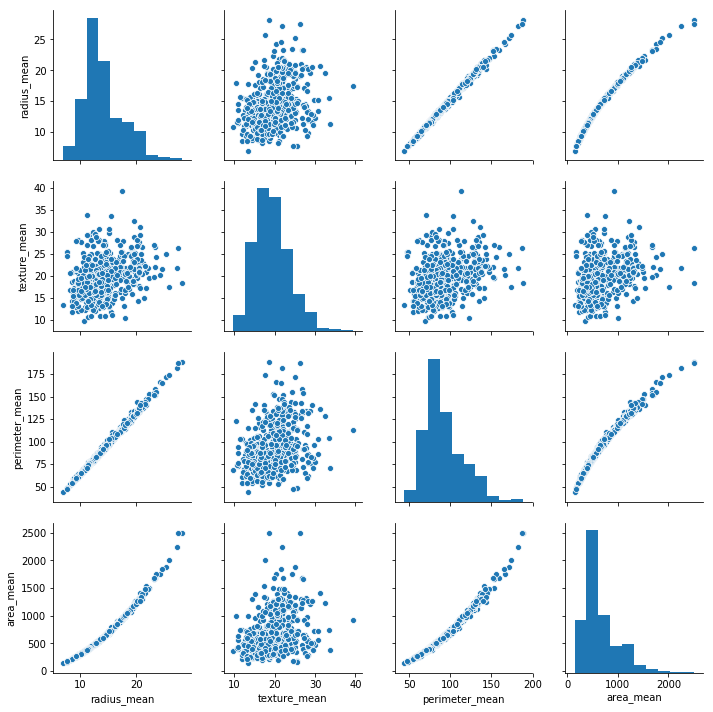

In [52]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']])

# Graficas multi variantes

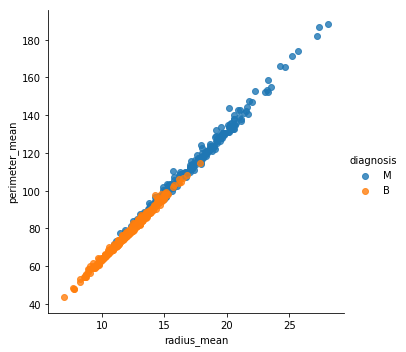

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='radius_mean', y='perimeter_mean', hue='diagnosis', 
           data=df.loc[df['diagnosis'].isin(['B', 'M'])], 
           fit_reg=False)

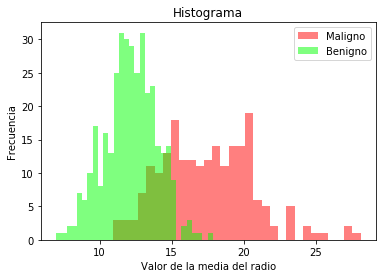

In [71]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Maligno")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Benigno")
plt.legend()
plt.xlabel("Valor de la media del radio")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

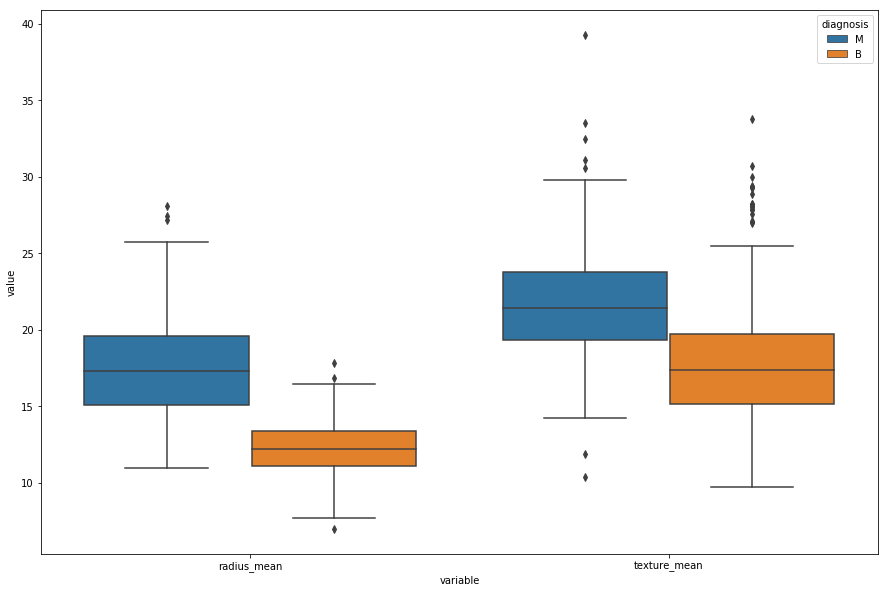

In [73]:
mdata = pd.melt(df,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= mdata)
plt.show()

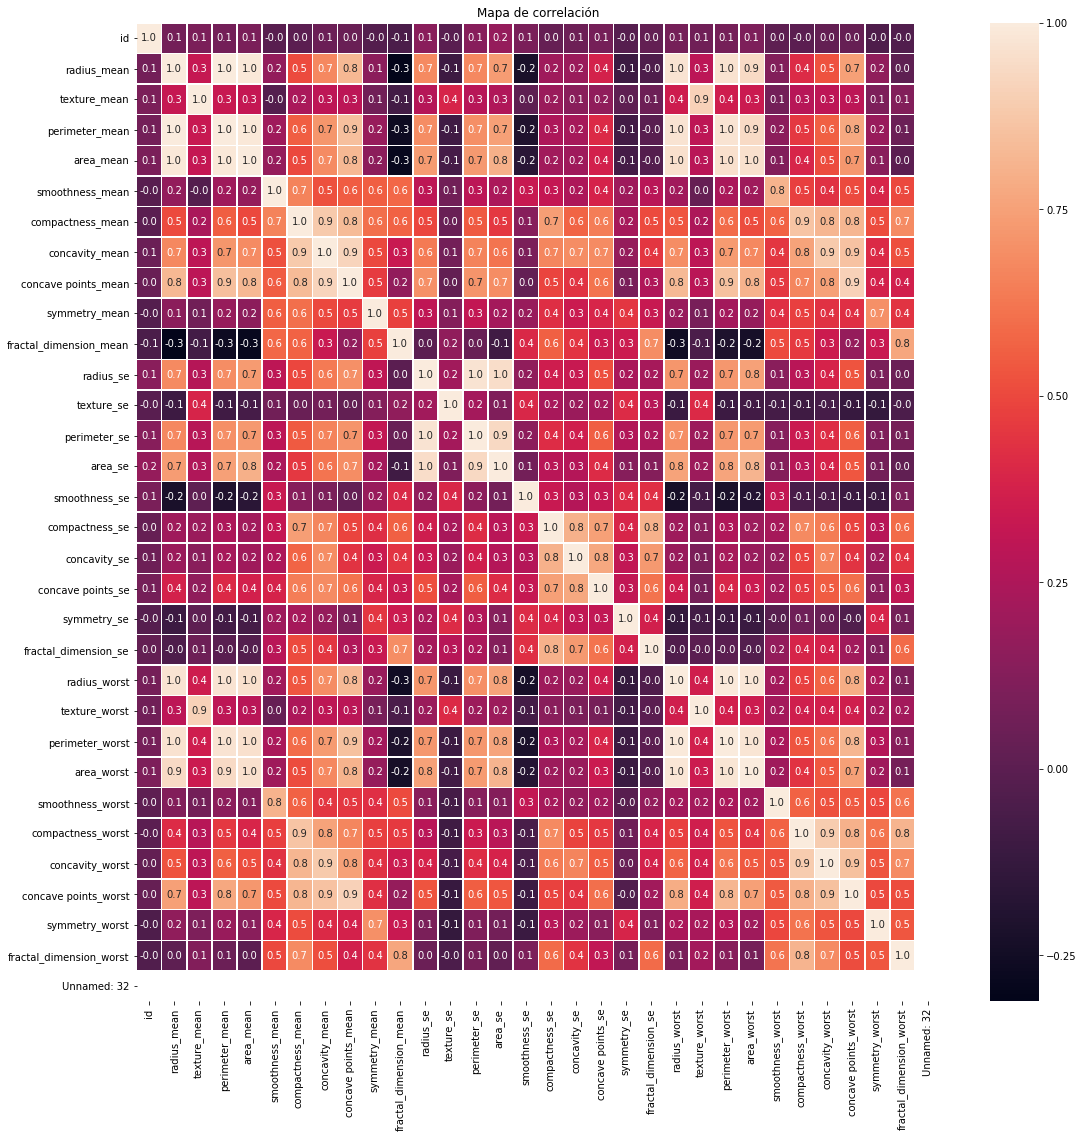

In [75]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

In [11]:
report = pandas_profiling.ProfileReport(df)
report.to_file("report.html")

# Tareas a realizar:

En esta practica trabajamos con dos tipos de bases de datos. La base de datos de criticas de vinos, y la de resultados de analisis de cancer de mama en mamografias. Cada equipo tendra que realizar los ejemplos con su propia base de datos. 

Las tareas a realizar son:

- Dar una descripcion estadistica basica (la primer parte de la practica, medias, covarianza, desviacion estandar, etc) de los datos de las columnas que a tu criterio ayudaran a entender mejor tus datos.

- Tomar la base de datos de cada quien, y después de realizar los cambios correspondientes de limpieza de datos (Practica 1) intentar hacer cada gráfica de ambas librerías.

- NOTA: En caso de que su base de datos no permita alguna de las gráficas, argumentar correctamente el por qué no puede usar la gráfica.

- Hacer una conclusion por cada una de las gráficas, tomando en cuenta los datos utilizados, y como pueden interpretarse.


- Realizar una comparacion entre scatter plot y hexplot. Cual es mejor en cual caso y explicar porque.
